### Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# weather_data = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List 

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

605

### Perform API Calls 

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# temp_test = []
# city_test = ['chicago', 'miami', 'london', 'xxx']
# good_cities = []
# for city in city_test:
#     response = requests.get(query_url + city).json()
#     try:
#         temp_test.append(response["main"]["temp"])
#         good_cities.append(city)
#         print(f"{city} found. Temp appending")
#     except KeyError:
#         print(f"no temp for {city}")
# print(response)
# print(temp_test)
# print(good_cities)


In [5]:
ok_cities = []
ok_lat = []
ok_lon = []
ok_maxtemp = []
ok_mintemp = []
ok_humidity = []
ok_clouds = []
ok_wind = []
ok_country = []
ok_date = []

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ok_cities.append(response["name"])
        ok_lat.append(response["coord"]["lat"])
        ok_lon.append(response["coord"]["lon"])
        ok_maxtemp.append(response["main"]["temp_max"])
        ok_mintemp.append(response["main"]["temp_min"])
        ok_humidity.append(response["main"]["humidity"])
        ok_clouds.append(response["clouds"]["all"])
        ok_wind.append(response["wind"]["speed"])
        ok_country.append(response["sys"]["country"])
        ok_date.append(response["dt"])
        print(f"Success! Appending {city}")
           
    except KeyError:
        print(f"Failed! No temp found for {city}")
print(response)

Failed! No temp found for barentsburg
Success! Appending surt
Success! Appending chara
Success! Appending raga
Success! Appending rikitea
Success! Appending esperance
Success! Appending atuona
Success! Appending pevek
Success! Appending maragogi
Success! Appending xam nua
Success! Appending salym
Success! Appending qaanaaq
Success! Appending busselton
Success! Appending new norfolk
Failed! No temp found for barawe
Success! Appending punta arenas
Success! Appending laguna
Success! Appending sao filipe
Success! Appending upernavik
Success! Appending bredasdorp
Success! Appending jamestown
Failed! No temp found for kamenskoye
Failed! No temp found for tabiauea
Success! Appending nikolskoye
Success! Appending butaritari
Success! Appending hasaki
Success! Appending chauk
Success! Appending hobart
Success! Appending vengerovo
Success! Appending constitucion
Failed! No temp found for umm durman
Success! Appending iralaya
Success! Appending taoudenni
Success! Appending esfarayen
Success! Appen

Success! Appending oistins
Success! Appending ust-kuyga
Success! Appending bougouni
Success! Appending birin
Success! Appending dilla
Success! Appending poum
Success! Appending yurimaguas
Success! Appending buchanan
Success! Appending baturaja
Success! Appending qixingtai
Success! Appending kampene
Success! Appending okakarara
Success! Appending meredith
Success! Appending buckeye
Success! Appending bathsheba
Success! Appending lala
Success! Appending tayu
Success! Appending san cristobal
Success! Appending carnarvon
Success! Appending saint-pierre
Failed! No temp found for belushya guba
Success! Appending krasnyy yar
Success! Appending lasa
Failed! No temp found for sumbawa
Success! Appending airai
Success! Appending tarakan
Success! Appending khovu-aksy
Success! Appending enshi
Success! Appending shakawe
Success! Appending opuwo
Success! Appending fortuna
Success! Appending novyy urengoy
Success! Appending cockburn town
Success! Appending noshiro
Success! Appending lagoa
Success! App

Success! Appending saldanha
Failed! No temp found for azimur
Success! Appending granville
Success! Appending aviles
Success! Appending sakakah
Success! Appending saint anthony
Success! Appending huanan
Success! Appending shimanovsk
Success! Appending bajil
Success! Appending nagua
Success! Appending oranjemund
Success! Appending kurumkan
Success! Appending belaya gora
Success! Appending nyurba
Success! Appending mubende
Success! Appending micheweni
Success! Appending council bluffs
Success! Appending huilong
Success! Appending birao
Success! Appending malanje
Success! Appending carauari
Failed! No temp found for zhanatas
Success! Appending sitka
Success! Appending taunggyi
Success! Appending mitsamiouli
Success! Appending camacha
Failed! No temp found for paradwip
Success! Appending muros
Success! Appending ardatov
Failed! No temp found for karamay
Success! Appending bara
Success! Appending north las vegas
Success! Appending san policarpo
Success! Appending deniliquin
{'coord': {'lon':

In [6]:
print(len(ok_cities))
print(len(ok_lat))
print(len(ok_lon))
print(len(ok_maxtemp))
print(len(ok_mintemp))
print(len(ok_humidity))
print(len(ok_clouds))
print(len(ok_wind))
print(len(ok_country))
print(len(ok_date))

555
555
555
555
555
555
555
555
555
555


### Convert Raw Data to DataFrame 

In [7]:
weather_dict = {"City": ok_cities, "Latitude": ok_lat, "Longitude": ok_lon, "Max Temp": ok_maxtemp, 
                "Humidity": ok_humidity, "Cloudiness": ok_clouds, "Wind Speed": ok_wind, 
                "Country": ok_country, "Date": ok_date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sirte,31.2089,16.5887,55.85,65,31,17.67,LY,1611792587
1,Chara,56.9064,118.2631,-31.86,77,100,0.63,RU,1611792710
2,Raja,8.4596,25.6780,70.90,25,49,3.91,SS,1611792710
3,Rikitea,-23.1203,-134.9692,79.95,73,92,11.68,PF,1611792711
4,Esperance,-33.8667,121.9000,66.20,77,90,9.22,AU,1611792711
...,...,...,...,...,...,...,...,...,...
550,Ardatov,55.2421,43.0970,33.67,95,100,13.18,RU,1611792954
551,Bara,10.3744,10.7288,73.85,17,25,10.51,NG,1611792954
552,North Las Vegas,36.1989,-115.1175,50.00,46,90,12.66,US,1611792915
553,San Policarpo,12.1791,125.5072,80.65,82,100,14.56,PH,1611792955


### Inspect data and remove cities where the humidty is > 100%

In [8]:
low_hum = pd.DataFrame(weather_df[weather_df["Humidity"]< 100])
low_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sirte,31.2089,16.5887,55.85,65,31,17.67,LY,1611792587
1,Chara,56.9064,118.2631,-31.86,77,100,0.63,RU,1611792710
2,Raja,8.4596,25.6780,70.90,25,49,3.91,SS,1611792710
3,Rikitea,-23.1203,-134.9692,79.95,73,92,11.68,PF,1611792711
4,Esperance,-33.8667,121.9000,66.20,77,90,9.22,AU,1611792711
...,...,...,...,...,...,...,...,...,...
550,Ardatov,55.2421,43.0970,33.67,95,100,13.18,RU,1611792954
551,Bara,10.3744,10.7288,73.85,17,25,10.51,NG,1611792954
552,North Las Vegas,36.1989,-115.1175,50.00,46,90,12.66,US,1611792915
553,San Policarpo,12.1791,125.5072,80.65,82,100,14.56,PH,1611792955


## Plotting the Data 

### Latitude vs. Temperature Plot 

Text(0, 0.5, 'Temperature')

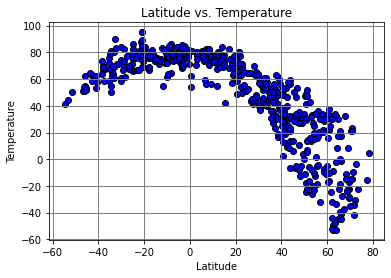

In [9]:
plot_lat = low_hum['Latitude']
plot_temp = low_hum["Max Temp"]

plt.scatter(plot_lat, plot_temp, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

### Latitude vs. Humidty Plot

Text(0, 0.5, 'Humidity')

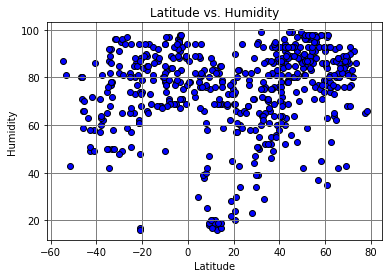

In [10]:
plot_lat = low_hum['Latitude']
plot_humidity = low_hum["Humidity"]

plt.scatter(plot_lat, plot_humidity, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Humidity')

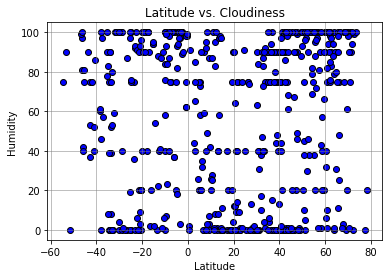

In [11]:
plot_lat = low_hum['Latitude']
plot_cloud = low_hum["Cloudiness"]

plt.scatter(plot_lat, plot_cloud, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

###  Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Humidity')

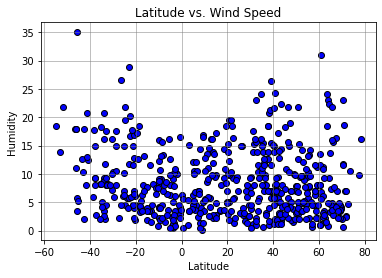

In [12]:
plot_lat = low_hum['Latitude']
plot_wind = low_hum["Wind Speed"]

plt.scatter(plot_lat, plot_wind, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Linear Regression

In [13]:
north_hem = pd.DataFrame(low_hum[low_hum["Latitude"]> 0])
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sirte,31.2089,16.5887,55.85,65,31,17.67,LY,1611792587
1,Chara,56.9064,118.2631,-31.86,77,100,0.63,RU,1611792710
2,Raja,8.4596,25.6780,70.90,25,49,3.91,SS,1611792710
6,Pevek,69.7008,170.3133,-22.29,88,100,4.09,RU,1611792711
8,Xam Nua,20.4197,104.0439,58.84,90,64,3.00,LA,1611792712


In [14]:
north_lat = north_hem["Latitude"]
north_maxtemp = north_hem["Max Temp"]
north_humid = north_hem["Humidity"]
north_cloud = north_hem["Cloudiness"]
north_wind = north_hem["Wind Speed"]

In [15]:
south_hem = pd.DataFrame(low_hum[low_hum["Latitude"]< 0])
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Rikitea,-23.1203,-134.9692,79.95,73,92,11.68,PF,1611792711
4,Esperance,-33.8667,121.9000,66.20,77,90,9.22,AU,1611792711
5,Atuona,-9.8000,-139.0333,78.78,78,7,15.93,PF,1611792711
7,Maragogi,-9.0122,-35.2225,77.22,83,23,9.13,BR,1611792492
11,Busselton,-33.6500,115.3333,64.00,77,8,11.72,AU,1611792713


In [16]:
south_lat = south_hem["Latitude"]
south_maxtemp = south_hem["Max Temp"]
south_humid = south_hem["Humidity"]
south_cloud = south_hem["Cloudiness"]
south_wind = south_hem["Wind Speed"]

### Northern Hemisphere: Max Temp vs. Latitude Linear Regression 

The r-value is -0.85


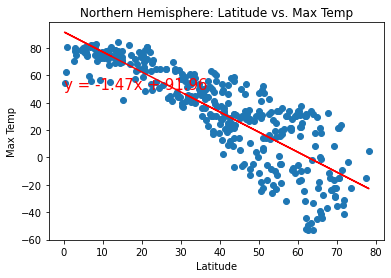

In [17]:
correlation = st.pearsonr(north_lat, north_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_maxtemp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_maxtemp)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Max Temp vs. Latitude Linear Regression 

The r-value is 0.63


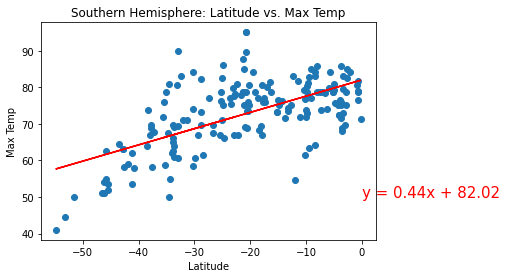

In [18]:
correlation = st.pearsonr(south_lat, south_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_maxtemp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_maxtemp)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Humidty (%) vs. Latitude Linear Regression 

The r-value is 0.39


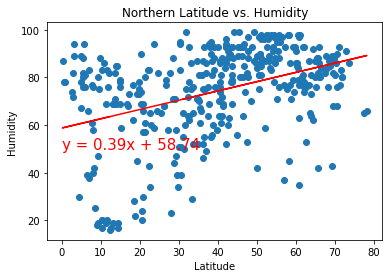

In [19]:
correlation = st.pearsonr(north_lat, north_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_humid)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Humidty (%) vs. Latitude Linear Regression 

The r-value is 0.35


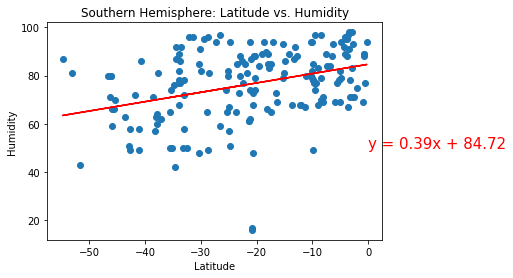

In [20]:
correlation = st.pearsonr(south_lat, south_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere: Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 

The r-value is 0.32


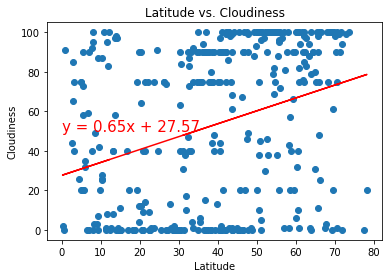

In [21]:
correlation = st.pearsonr(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 

The r-value is 0.19


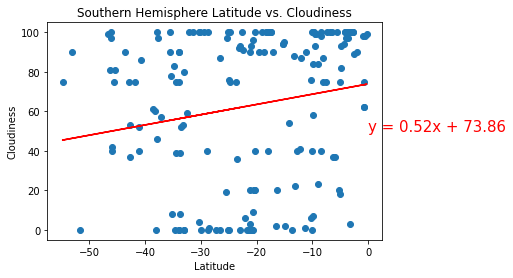

In [22]:
correlation = st.pearsonr(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 

The r-value is 0.0


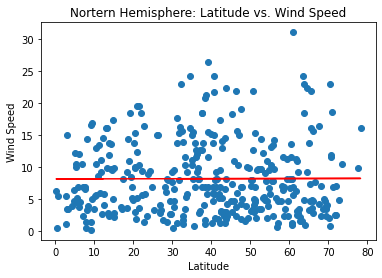

In [23]:
correlation = st.pearsonr(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Nortern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 

The r-value is -0.38


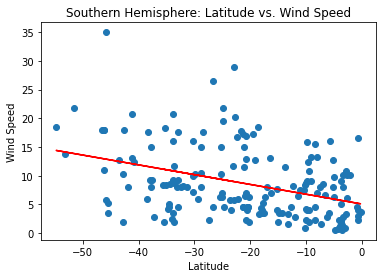

In [24]:
correlation = st.pearsonr(south_lat, south_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

In [26]:
weather_df.to_csv("output_data/cities.csv", index=False, header=True)